In [23]:
# Importação das bibliotecas necessárias
import json

# Defino o caminho do arquivo JSON contendo as anotações dos keypoints.
json_path = "keypoints.json"

# Crio uma função para carregar e analisar o conteúdo do arquivo JSON.
def load_and_analyze_keypoints(json_file):
    try:
        # Abro e carrego o conteúdo do arquivo JSON para dentro de um dicionário.
        with open(json_file, 'r') as f:
            keypoints_data = json.load(f)
        
        # Verifico as chaves principais dentro do dicionário para entender a estrutura dos dados.
        # Isso me ajuda a identificar quais tipos de informações estão disponíveis.
        print("Chaves principais no JSON:")
        for key in keypoints_data.keys():
            print(f"Chave: {key} - Tipo: {type(keypoints_data[key])}")
        
        # Escolho a primeira chave para explorar e exibo um exemplo de seus dados.
        # Dessa forma, consigo visualizar como as informações estão organizadas.
        sample_key = list(keypoints_data.keys())[0]
        print(f"\nExemplo de entrada para a chave '{sample_key}':")
        print(json.dumps(keypoints_data[sample_key], indent=4))

        # Retorno os dados carregados para análise posterior.
        return keypoints_data
    except Exception as e:
        # Caso ocorra algum problema, como caminho incorreto ou arquivo corrompido, trato o erro e informo o problema.
        print(f"Erro ao carregar o arquivo JSON: {e}")
        return None

# Carrego o JSON e analiso suas informações principais, visualizando as chaves e um exemplo de entrada.
keypoints_data = load_and_analyze_keypoints(json_path)


Chaves principais no JSON:
Chave: images - Tipo: <class 'dict'>
Chave: annotations - Tipo: <class 'list'>
Chave: categories - Tipo: <class 'list'>
Chave: info - Tipo: <class 'dict'>

Exemplo de entrada para a chave 'images':
{
    "1": "2007_000063.jpg",
    "2": "2007_000175.jpg",
    "3": "2007_000332.jpg",
    "4": "2007_000392.jpg",
    "5": "2007_000464.jpg",
    "6": "2007_000491.jpg",
    "7": "2007_000504.jpg",
    "8": "2007_000528.jpg",
    "9": "2007_000549.jpg",
    "10": "2007_000676.jpg",
    "11": "2007_000720.jpg",
    "12": "2007_000783.jpg",
    "13": "2007_000799.jpg",
    "14": "2007_000836.jpg",
    "15": "2007_000876.jpg",
    "16": "2007_000904.jpg",
    "17": "2007_000925.jpg",
    "18": "2007_001073.jpg",
    "19": "2007_001185.jpg",
    "20": "2007_001416.jpg",
    "21": "2007_001225.jpg",
    "22": "2007_001239.jpg",
    "23": "2007_001299.jpg",
    "24": "2007_001340.jpg",
    "25": "2007_001397.jpg",
    "26": "2007_001586.jpg",
    "27": "2007_001594.jpg",

Chaves principais no JSON:
Chave: images - Tipo: <class 'dict'>
Chave: annotations - Tipo: <class 'list'>
Chave: categories - Tipo: <class 'list'>
Chave: info - Tipo: <class 'dict'>
Número de imagens: 4608
Número de anotações: 6117
Número de categorias: 5
IDs correspondentes a bovinos: [5]
Número de anotações de bovinos: 842
Número de imagens de bovinos encontradas na pasta: 200
Total de imagens faltantes: 642
Exemplos de imagens faltantes: ['2007_000464.jpg', '2007_000464.jpg', '2007_000491.jpg', '2007_000504.jpg', '2007_000904.jpg', '2007_001073.jpg', '2007_001073.jpg', '2007_001073.jpg', '2007_001073.jpg', '2007_001073.jpg']
Exibindo exemplo de imagem de bovino: co1.jpeg


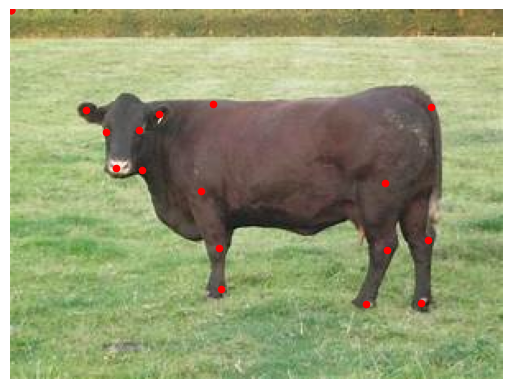

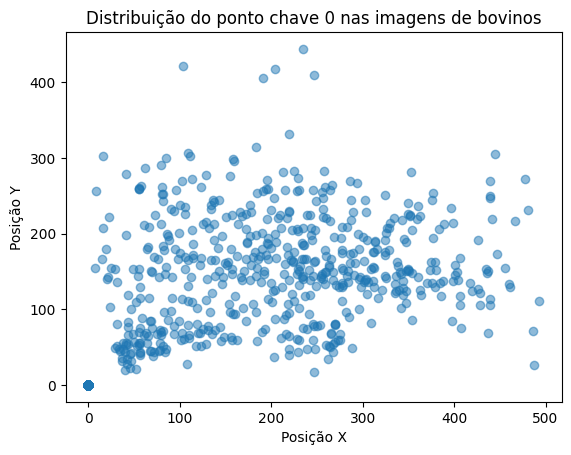

In [24]:
# Importo as bibliotecas necessárias para manipulação de imagens e gráficos.
import os
import json
import matplotlib.pyplot as plt
from PIL import Image

# Defino o caminho para o arquivo JSON que contém as anotações dos keypoints.
json_path = "keypoints.json"

# Função para carregar e analisar o conteúdo do JSON.
def load_and_analyze_keypoints(json_file):
    try:
        # Abro e carrego o JSON para dentro de um dicionário Python.
        with open(json_file, 'r') as f:
            keypoints_data = json.load(f)
        
        # Verifico as chaves principais no dicionário para entender a estrutura dos dados disponíveis.
        print("Chaves principais no JSON:")
        for key in keypoints_data.keys():
            print(f"Chave: {key} - Tipo: {type(keypoints_data[key])}")
        
        # Retorno os dados carregados para que eu possa analisá-los posteriormente.
        return keypoints_data
    except Exception as e:
        # Caso ocorra algum erro, trato a exceção e informo qual foi o problema ao tentar carregar o JSON.
        print(f"Erro ao carregar o arquivo JSON: {e}")
        return None

# Carrego o JSON e armazeno os dados em uma variável para análise.
keypoints_data = load_and_analyze_keypoints(json_path)

# Extraio as diferentes seções do JSON para facilitar o acesso aos dados necessários.
# Cada seção corresponde a um tipo específico de informação.
images_data = keypoints_data.get('images', {})
annotations_data = keypoints_data.get('annotations', [])
categories_data = keypoints_data.get('categories', [])
print(f"Número de imagens: {len(images_data)}")
print(f"Número de anotações: {len(annotations_data)}")
print(f"Número de categorias: {len(categories_data)}")

# Crio um dicionário que associa o ID das categorias aos seus nomes.
# Isso facilita a identificação de quais IDs correspondem a bovinos, por exemplo.
category_id_to_name = {category['id']: category['name'] for category in categories_data}

# Filtrando apenas o ID correspondente à categoria "cow" (bovino).
# Isso é necessário para focar apenas nas anotações de bovinos.
cow_category_ids = [category['id'] for category in categories_data if category['name'].lower() == 'cow']
print(f"IDs correspondentes a bovinos: {cow_category_ids}")

# Filtrando todas as anotações que pertencem à categoria de bovinos.
# Quero garantir que só estou analisando anotações relevantes para o meu objetivo.
cow_annotations = [anno for anno in annotations_data if anno['category_id'] in cow_category_ids]
print(f"Número de anotações de bovinos: {len(cow_annotations)}")

# Defino o caminho para a pasta que contém as imagens de bovinos.
# É importante que essas imagens correspondam às anotações filtradas anteriormente.
cow_images_path = r"C:\Users\wasse\Downloads\pose-estimation\animalpose_image_part2\cow"

# Listo todas as imagens de bovinos disponíveis na pasta.
# Isso me ajuda a verificar se todas as imagens mencionadas nas anotações realmente existem no diretório.
cow_images_available = os.listdir(cow_images_path)
print(f"Número de imagens de bovinos encontradas na pasta: {len(cow_images_available)}")

# Verifico se cada imagem de bovino mencionada no JSON está realmente disponível na pasta.
# Adiciono as imagens ausentes a uma lista de "imagens faltantes" para depuração.
missing_images = []
for anno in cow_annotations:
    image_id = str(anno['image_id'])
    image_name = images_data.get(image_id, None)
    if image_name and image_name not in cow_images_available:
        missing_images.append(image_name)

# Exibo algumas imagens faltantes para verificar quais arquivos não foram encontrados.
# Isso ajuda a entender se há algum problema com os dados fornecidos.
if missing_images:
    print(f"Total de imagens faltantes: {len(missing_images)}")
    print(f"Exemplos de imagens faltantes: {missing_images[:10]}")
else:
    # Se todas as imagens estiverem disponíveis, confirmo que estou pronto para prosseguir com a análise.
    print("Todas as imagens de bovinos estão disponíveis.")

# Tenta exibir um exemplo de imagem de bovino com os keypoints anotados.
# Faço isso para garantir que os dados e as imagens estão sincronizados corretamente.
if cow_annotations:
    for example_annotation in cow_annotations:
        image_id = str(example_annotation['image_id'])
        image_name = images_data.get(image_id, None)
        if image_name and image_name in cow_images_available:
            example_image_path = os.path.join(cow_images_path, image_name)
            if os.path.exists(example_image_path):
                print(f"Exibindo exemplo de imagem de bovino: {image_name}")
                show_image_with_keypoints(example_image_path, example_annotation['keypoints'])
                break
else:
    # Se não encontrar nenhuma anotação válida, informo que não há dados disponíveis para exibição.
    print("Nenhuma anotação de bovino encontrada para exibição.")

# Crio uma função para plotar a distribuição dos pontos-chave nas imagens de bovinos.
# Isso me permite visualizar a variação das posições dos keypoints.
def plot_keypoints_distribution(annotations, keypoint_idx, title):
    # Extraio as coordenadas X e Y para o ponto-chave específico que quero analisar.
    keypoint_x = [entry['keypoints'][keypoint_idx][0] for entry in annotations if 'keypoints' in entry and len(entry['keypoints']) > keypoint_idx]
    keypoint_y = [entry['keypoints'][keypoint_idx][1] for entry in annotations if 'keypoints' in entry and len(entry['keypoints']) > keypoint_idx]
    if keypoint_x and keypoint_y:
        # Crio um gráfico de dispersão para visualizar a distribuição dos keypoints.
        plt.scatter(keypoint_x, keypoint_y, alpha=0.5)
        plt.title(title)
        plt.xlabel('Posição X')
        plt.ylabel('Posição Y')
        plt.show()
    else:
        # Caso não haja dados suficientes, informo que o gráfico não pode ser gerado.
        print("Não há dados suficientes para gerar o gráfico de keypoints.")

# Visualizo a distribuição do ponto chave 0 nas imagens de bovinos.
# Isso me ajuda a entender como esse ponto específico está posicionado na maioria das imagens.
plot_keypoints_distribution(cow_annotations, keypoint_idx=0, title="Distribuição do ponto chave 0 nas imagens de bovinos")



Chaves principais no JSON:
Chave: images - Tipo: <class 'dict'>
Chave: annotations - Tipo: <class 'list'>
Chave: categories - Tipo: <class 'list'>
Chave: info - Tipo: <class 'dict'>
Número de imagens no JSON: 4608
Número de anotações: 6117
Número de categorias: 5
IDs correspondentes a bovinos: [5]
Número de anotações de bovinos com imagens disponíveis: 200
Exibindo exemplo de imagem de bovino: co1.jpeg


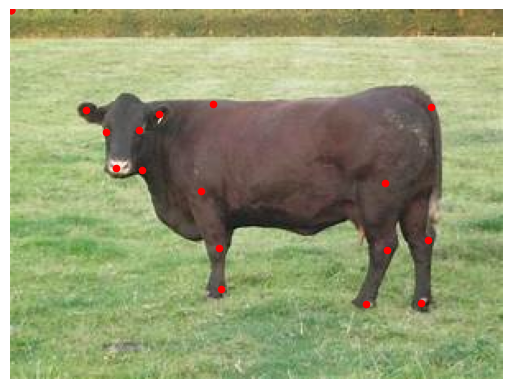

Visualização dos primeiros registros dos keypoints de bovinos:
  image_id image_name  keypoint_index   x   y
0     3809   co1.jpeg               0  78  73
1     3809   co1.jpeg               1  58  74
2     3809   co1.jpeg               2  64  96
3     3809   co1.jpeg               3  90  63
4     3809   co1.jpeg               4  46  61


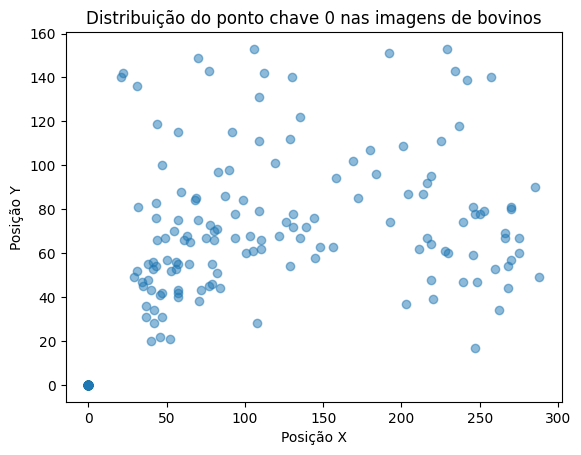

Estatísticas médias das posições dos keypoints por imagem:
                 x       y
image_name                
co1.jpeg    117.15   87.65
co10.jpeg    56.00   52.80
co100.jpeg  119.75   86.05
co101.jpeg  147.80  102.25
co102.jpeg  102.05  105.25
Visualização de algumas imagens processadas com keypoints:
Exibindo imagem: co1.jpeg


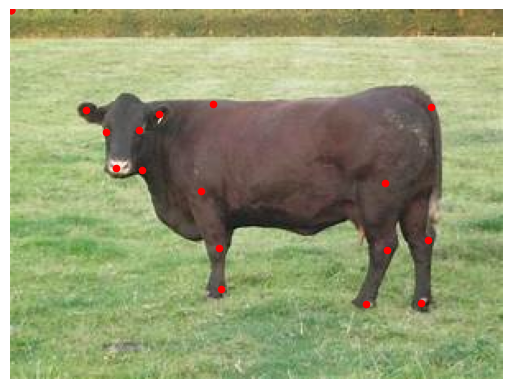

Exibindo imagem: co10.jpeg


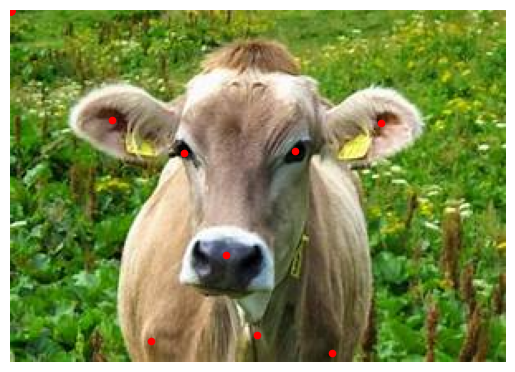

Exibindo imagem: co100.jpeg


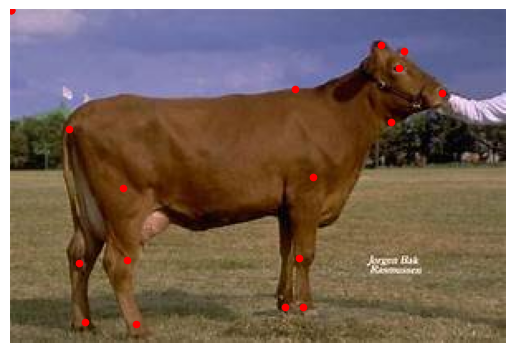

Exibindo imagem: co101.jpeg


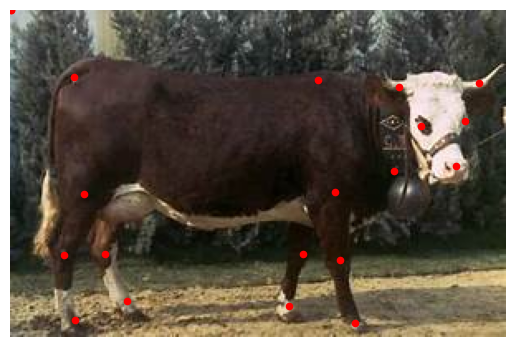

Exibindo imagem: co102.jpeg


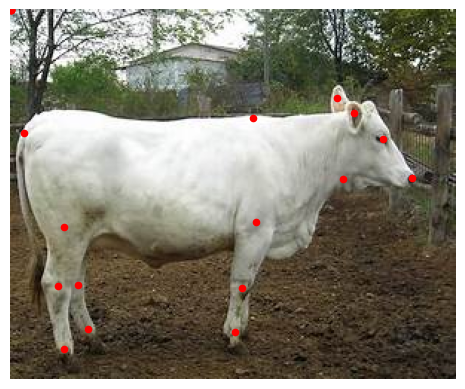

In [25]:
# Importo as bibliotecas necessárias para manipulação de dados, gráficos e imagens.
import os
import json
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np

# Defino os caminhos para o arquivo JSON e para a pasta que contém as imagens de bovinos.
json_path = "keypoints.json"
cow_images_path = r"C:\Users\wasse\Downloads\pose-estimation\animalpose_image_part2\cow"

# Crio uma função para carregar e analisar o conteúdo do JSON.
def load_and_analyze_keypoints(json_file):
    try:
        # Abro e carrego o conteúdo do JSON para dentro de um dicionário.
        with open(json_file, 'r') as f:
            keypoints_data = json.load(f)
        
        # Verifico as chaves principais do JSON para entender a estrutura dos dados.
        print("Chaves principais no JSON:")
        for key in keypoints_data.keys():
            print(f"Chave: {key} - Tipo: {type(keypoints_data[key])}")
        
        # Retorno os dados carregados para que eu possa trabalhá-los posteriormente.
        return keypoints_data
    except Exception as e:
        # Trato qualquer erro que possa ocorrer durante o carregamento do JSON.
        print(f"Erro ao carregar o arquivo JSON: {e}")
        return None

# Carrego o JSON e armazeno os dados em uma variável para análise.
keypoints_data = load_and_analyze_keypoints(json_path)

# Extraio as seções principais do JSON para facilitar o acesso e a manipulação dos dados.
images_data = keypoints_data.get('images', {})
annotations_data = keypoints_data.get('annotations', [])
categories_data = keypoints_data.get('categories', [])
print(f"Número de imagens no JSON: {len(images_data)}")
print(f"Número de anotações: {len(annotations_data)}")
print(f"Número de categorias: {len(categories_data)}")

# Crio um dicionário que mapeia os IDs das categorias para seus respectivos nomes.
# Isso me permite identificar facilmente a categoria dos animais nas anotações.
category_id_to_name = {category['id']: category['name'] for category in categories_data}

# Verifico quais IDs correspondem à categoria "cow".
# Isso é necessário para filtrar apenas as anotações que correspondem a bovinos.
cow_category_ids = [category['id'] for category in categories_data if category['name'].lower() == 'cow']
print(f"IDs correspondentes a bovinos: {cow_category_ids}")

# Filtrando apenas as anotações de bovinos cujas imagens estão disponíveis na pasta.
# Isso garante que só vou trabalhar com dados consistentes e que realmente existem.
cow_annotations = [
    anno for anno in annotations_data 
    if anno['category_id'] in cow_category_ids and images_data.get(str(anno['image_id'])) in os.listdir(cow_images_path)
]
print(f"Número de anotações de bovinos com imagens disponíveis: {len(cow_annotations)}")

# Crio uma função para exibir uma imagem de bovino com seus keypoints anotados.
# Isso me permite verificar visualmente se os keypoints estão bem posicionados na imagem.
def show_image_with_keypoints(image_path, keypoints):
    try:
        # Abro a imagem usando a biblioteca PIL e a exibo usando matplotlib.
        image = Image.open(image_path)
        plt.imshow(image)
        for kp in keypoints:
            if len(kp) >= 2:  # Verifico se há coordenadas X e Y disponíveis no ponto-chave.
                # Ploto cada ponto-chave na imagem usando um marcador vermelho.
                plt.scatter(kp[0], kp[1], c='red', s=20) 
        plt.axis('off')  # Desligo os eixos para focar apenas na imagem.
        plt.show()
    except Exception as e:
        # Caso ocorra algum problema ao carregar ou exibir a imagem, trato o erro.
        print(f"Erro ao carregar ou exibir a imagem: {e}")

# Tento exibir um exemplo de imagem de bovino com os keypoints anotados.
# Faço isso apenas para imagens que estão realmente disponíveis na pasta.
if cow_annotations:
    for example_annotation in cow_annotations:
        image_id = str(example_annotation['image_id'])
        image_name = images_data.get(image_id, None)
        if image_name:
            example_image_path = os.path.join(cow_images_path, image_name)
            if os.path.exists(example_image_path):
                print(f"Exibindo exemplo de imagem de bovino: {image_name}")
                show_image_with_keypoints(example_image_path, example_annotation['keypoints'])
                break
else:
    # Caso não encontre nenhuma anotação válida, informo que não há dados disponíveis para exibição.
    print("Nenhuma anotação de bovino encontrada para exibição.")

# Crio uma lista para armazenar as posições dos keypoints de todas as imagens de bovinos.
keypoints_list = []

# Percorro cada anotação de bovino para extrair as posições dos keypoints.
for annotation in cow_annotations:
    image_id = str(annotation['image_id'])
    image_name = images_data.get(image_id)
    keypoints = annotation['keypoints']
    for idx, kp in enumerate(keypoints):
        if len(kp) >= 2:  # Certifico-me de que as coordenadas X e Y estão presentes.
            # Armazeno os detalhes do keypoint em um dicionário e adiciono à lista.
            keypoints_list.append({
                'image_id': image_id,
                'image_name': image_name,
                'keypoint_index': idx,
                'x': kp[0],
                'y': kp[1]
            })

# Converto a lista de keypoints em um dataframe para facilitar a análise.
keypoints_df = pd.DataFrame(keypoints_list)

# Exibo os primeiros registros do dataframe para confirmar que os dados foram carregados corretamente.
print("Visualização dos primeiros registros dos keypoints de bovinos:")
print(keypoints_df.head())

# Crio uma função para plotar a distribuição dos keypoints para um ponto específico.
# Isso ajuda a visualizar como esse ponto está distribuído entre todas as imagens.
def plot_keypoints_distribution(df, keypoint_idx, title):
    df_keypoint = df[df['keypoint_index'] == keypoint_idx]
    plt.scatter(df_keypoint['x'], df_keypoint['y'], alpha=0.5)
    plt.title(title)
    plt.xlabel('Posição X')
    plt.ylabel('Posição Y')
    plt.show()

# Visualizo a distribuição do ponto chave 0 para todas as imagens de bovinos.
plot_keypoints_distribution(keypoints_df, keypoint_idx=0, title="Distribuição do ponto chave 0 nas imagens de bovinos")

# Analiso estatísticas médias dos keypoints por imagem.
# Isso me ajuda a entender a posição média dos keypoints em cada imagem.
keypoint_stats = keypoints_df.groupby('image_name')[['x', 'y']].mean()
print("Estatísticas médias das posições dos keypoints por imagem:")
print(keypoint_stats.head())

# Salvo as estatísticas em um arquivo CSV para futuras análises.
keypoint_stats.to_csv("keypoint_stats.csv")

# Exibo algumas imagens processadas com seus keypoints anotados.
# Faço isso para visualizar e validar os dados coletados.
print("Visualização de algumas imagens processadas com keypoints:")
for example_annotation in cow_annotations[:5]:  # Visualizo as primeiras 5 imagens de bovinos com keypoints.
    image_id = str(example_annotation['image_id'])
    image_name = images_data.get(image_id, None)
    if image_name:
        image_path = os.path.join(cow_images_path, image_name)
        if os.path.exists(image_path):
            print(f"Exibindo imagem: {image_name}")
            show_image_with_keypoints(image_path, example_annotation['keypoints'])



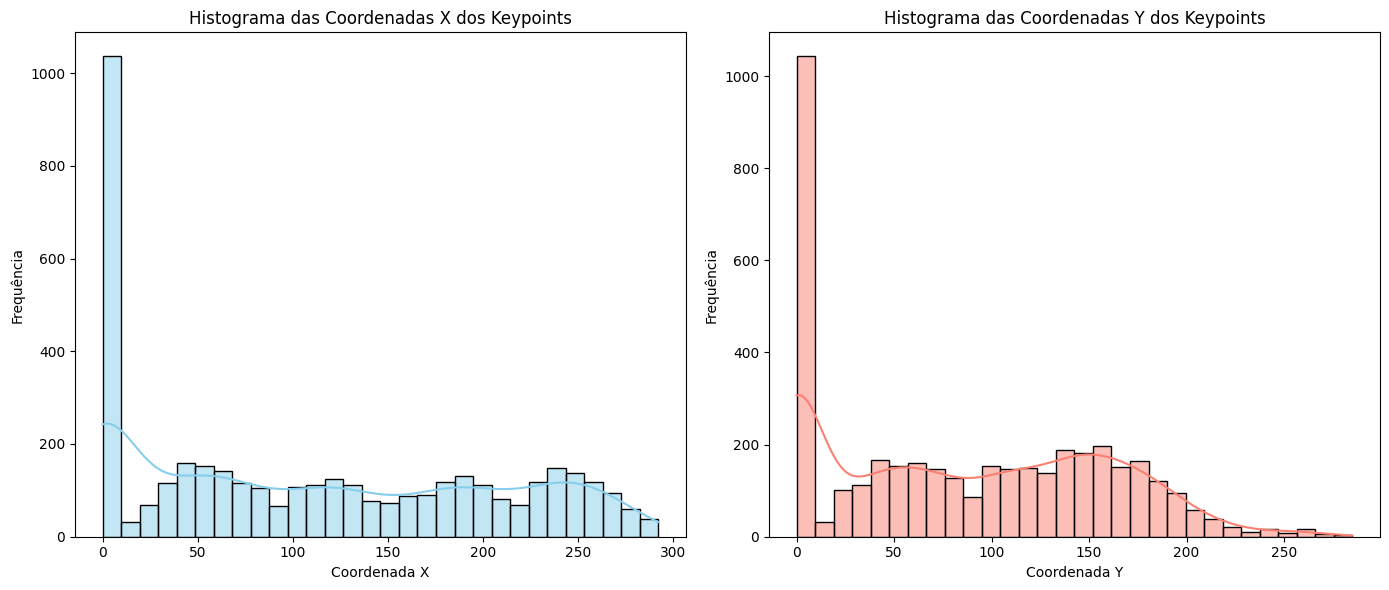

C:\Users\wasse\AppData\Local\Temp\ipykernel_15592\2459213613.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='keypoint_index', y='x', data=keypoints_df, palette='Blues')
C:\Users\wasse\AppData\Local\Temp\ipykernel_15592\2459213613.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='keypoint_index', y='y', data=keypoints_df, palette='Oranges')


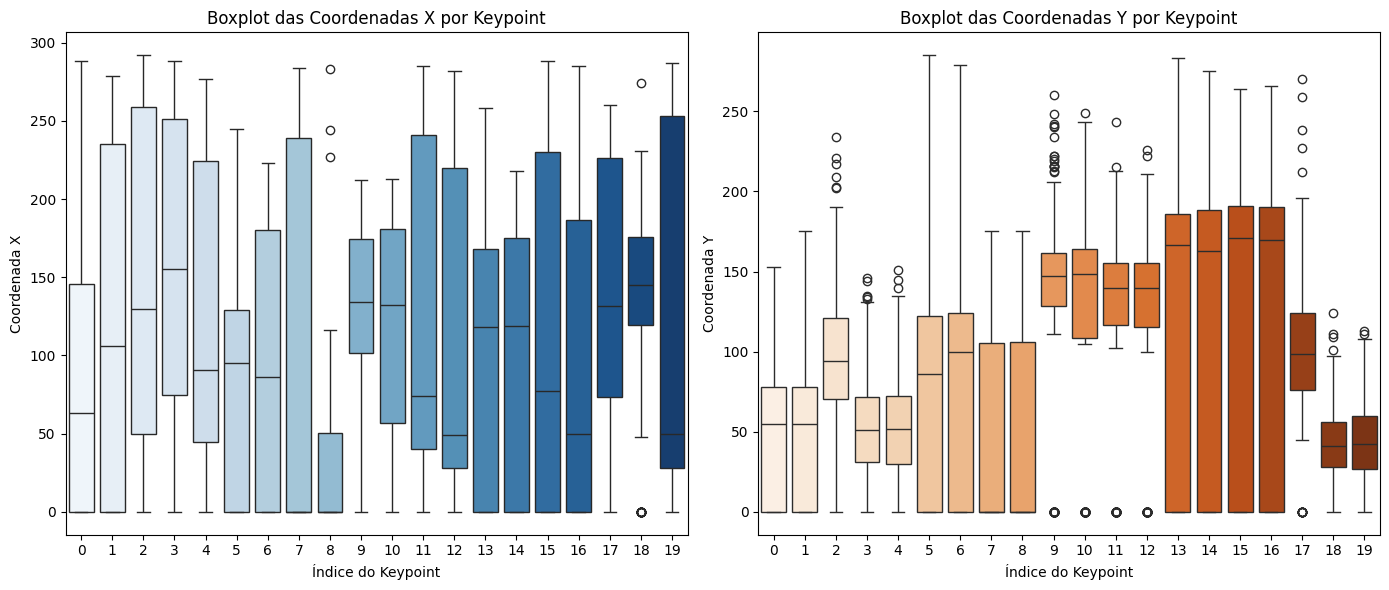

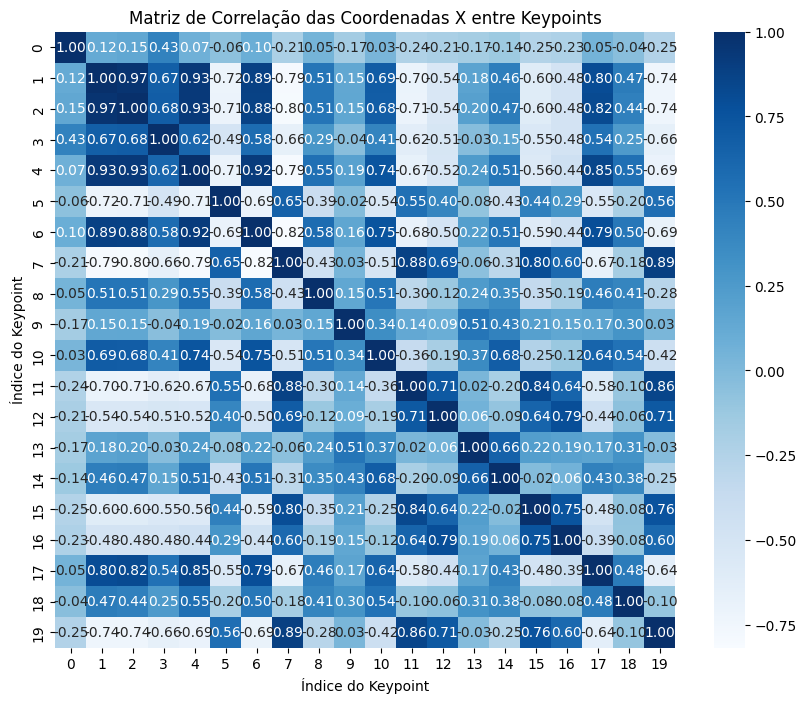

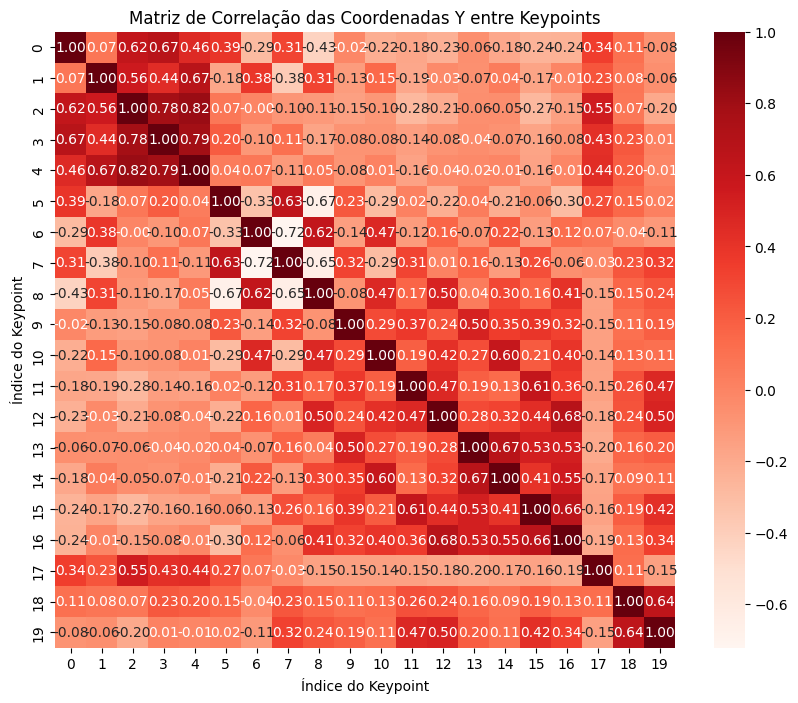

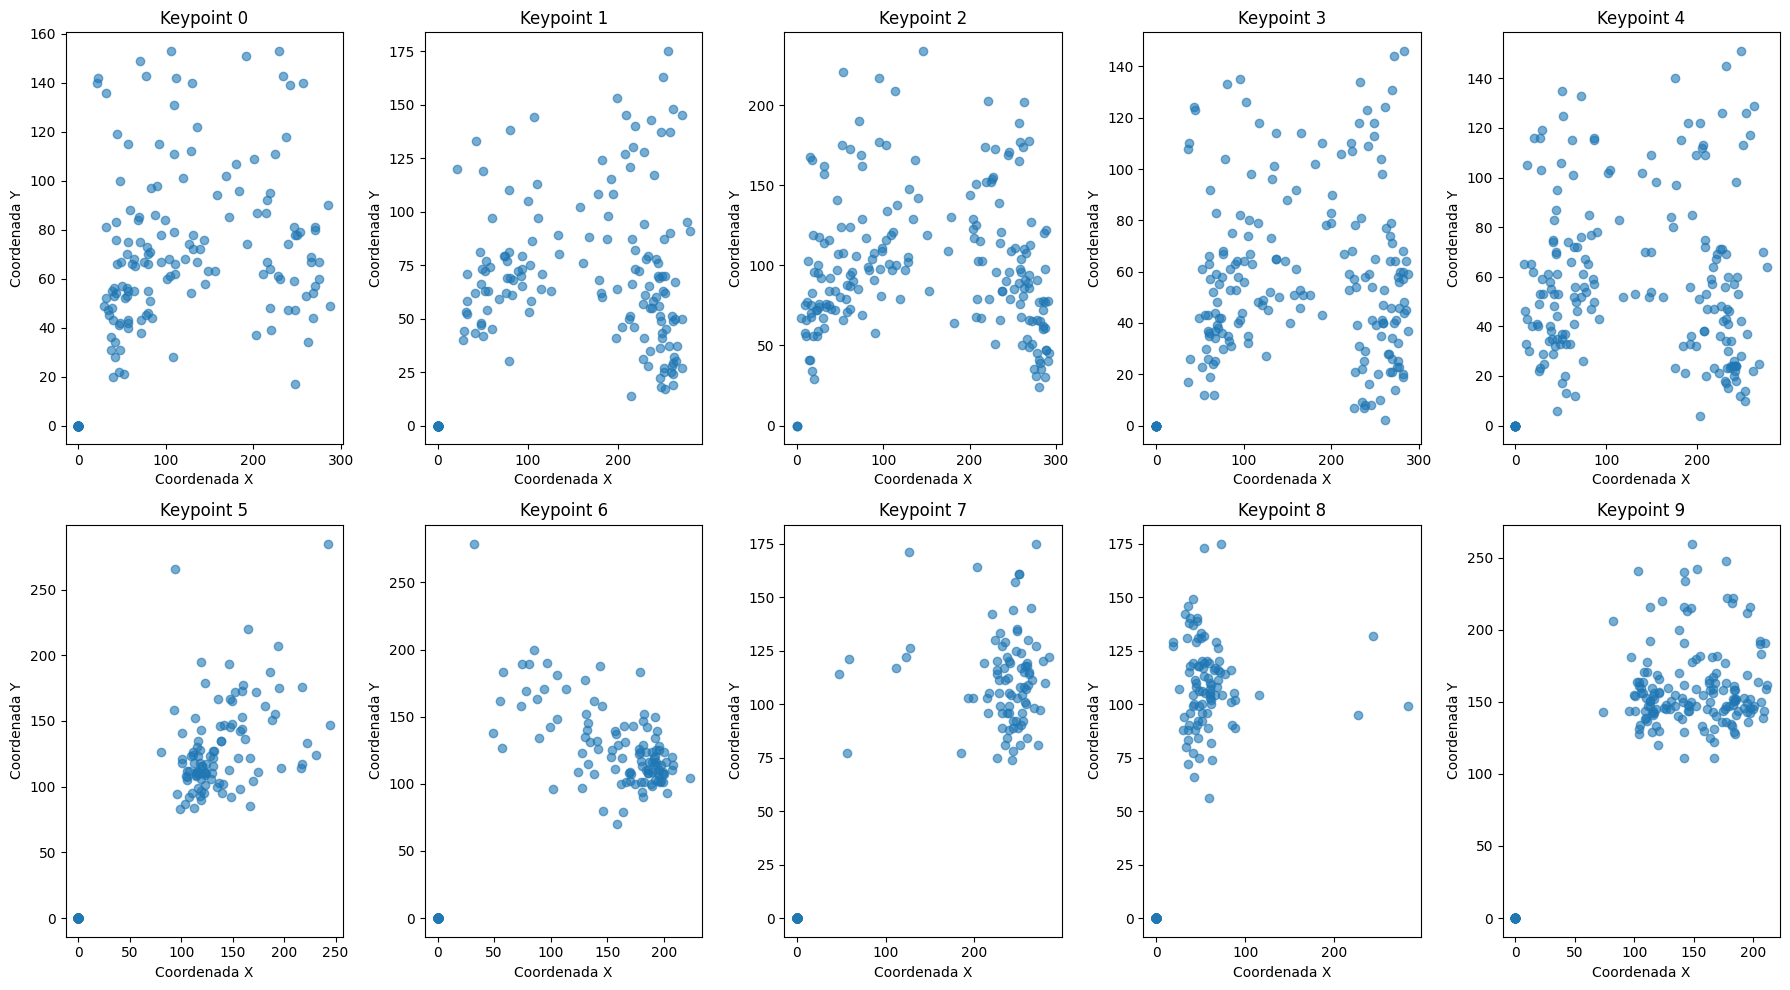

In [27]:
# Importação das bibliotecas necessárias
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np

# Caminhos para o arquivo JSON e as imagens de bovinos
json_path = "keypoints.json"
cow_images_path = r"C:\Users\wasse\Downloads\pose-estimation\animalpose_image_part2\cow"

# Função para carregar e analisar o JSON (mesma função anterior)
def load_and_analyze_keypoints(json_file):
    try:
        with open(json_file, 'r') as f:
            keypoints_data = json.load(f)
        return keypoints_data
    except Exception as e:
        print(f"Erro ao carregar o arquivo JSON: {e}")
        return None

# Carregar o JSON
keypoints_data = load_and_analyze_keypoints(json_path)

# Obter dados principais
images_data = keypoints_data.get('images', {})
annotations_data = keypoints_data.get('annotations', [])
categories_data = keypoints_data.get('categories', [])
cow_category_ids = [category['id'] for category in categories_data if category['name'].lower() == 'cow']

# Filtrar as anotações de bovinos e garantir que as imagens correspondentes estão disponíveis
cow_annotations = [
    anno for anno in annotations_data 
    if anno['category_id'] in cow_category_ids and images_data.get(str(anno['image_id'])) in os.listdir(cow_images_path)
]

# Convertendo anotações de keypoints para dataframe
keypoints_list = []
for annotation in cow_annotations:
    image_id = str(annotation['image_id'])
    image_name = images_data.get(image_id)
    keypoints = annotation['keypoints']
    for idx, kp in enumerate(keypoints):
        if len(kp) >= 2:  # Verificar se X e Y estão presentes
            keypoints_list.append({
                'image_id': image_id,
                'image_name': image_name,
                'keypoint_index': idx,
                'x': kp[0],
                'y': kp[1]
            })

# Convertendo lista de keypoints em dataframe
keypoints_df = pd.DataFrame(keypoints_list)

# Análise 1: Histograma das coordenadas X e Y dos keypoints
plt.figure(figsize=(14, 6))

# Histograma da coordenada X
plt.subplot(1, 2, 1)
sns.histplot(keypoints_df['x'], bins=30, kde=True, color='skyblue')
plt.title('Histograma das Coordenadas X dos Keypoints')
plt.xlabel('Coordenada X')
plt.ylabel('Frequência')

# Histograma da coordenada Y
plt.subplot(1, 2, 2)
sns.histplot(keypoints_df['y'], bins=30, kde=True, color='salmon')
plt.title('Histograma das Coordenadas Y dos Keypoints')
plt.xlabel('Coordenada Y')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Análise 2: Boxplot das coordenadas X e Y por índice de keypoint
plt.figure(figsize=(14, 6))

# Boxplot da coordenada X
plt.subplot(1, 2, 1)
sns.boxplot(x='keypoint_index', y='x', data=keypoints_df, palette='Blues')
plt.title('Boxplot das Coordenadas X por Keypoint')
plt.xlabel('Índice do Keypoint')
plt.ylabel('Coordenada X')

# Boxplot da coordenada Y
plt.subplot(1, 2, 2)
sns.boxplot(x='keypoint_index', y='y', data=keypoints_df, palette='Oranges')
plt.title('Boxplot das Coordenadas Y por Keypoint')
plt.xlabel('Índice do Keypoint')
plt.ylabel('Coordenada Y')

plt.tight_layout()
plt.show()

# Análise 3: Matriz de correlação entre as coordenadas dos keypoints
# Pivotar o dataframe para que cada coluna represente uma coordenada específica por índice de keypoint
pivot_df_x = keypoints_df.pivot(index='image_id', columns='keypoint_index', values='x')
pivot_df_y = keypoints_df.pivot(index='image_id', columns='keypoint_index', values='y')

# Calculando a correlação entre os keypoints em X e Y
corr_x = pivot_df_x.corr()
corr_y = pivot_df_y.corr()

# Visualizar a matriz de correlação para as coordenadas X
plt.figure(figsize=(10, 8))
sns.heatmap(corr_x, annot=True, cmap='Blues', fmt=".2f")
plt.title('Matriz de Correlação das Coordenadas X entre Keypoints')
plt.xlabel('Índice do Keypoint')
plt.ylabel('Índice do Keypoint')
plt.show()

# Visualizar a matriz de correlação para as coordenadas Y
plt.figure(figsize=(10, 8))
sns.heatmap(corr_y, annot=True, cmap='Reds', fmt=".2f")
plt.title('Matriz de Correlação das Coordenadas Y entre Keypoints')
plt.xlabel('Índice do Keypoint')
plt.ylabel('Índice do Keypoint')
plt.show()

# Análise 4: Distribuição dos Keypoints por Categoria de Ponto
# Aqui vou criar um gráfico de dispersão para cada índice de keypoint para visualizar o comportamento em conjunto

plt.figure(figsize=(18, 10))
for idx in range(10):  # Considerando apenas os 10 primeiros keypoints
    plt.subplot(2, 5, idx+1)
    subset = keypoints_df[keypoints_df['keypoint_index'] == idx]
    plt.scatter(subset['x'], subset['y'], alpha=0.6)
    plt.title(f'Keypoint {idx}')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')

plt.tight_layout()
plt.show()
